In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train.txt'
dev_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/dev.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test.txt'

data_train = []
with open(train_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_train.append([sentence, word, pos, tag])
    else:
      sentence += 1

In [4]:
data_dev = []
with open(dev_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_dev.append([sentence, word, pos, tag])
    else:
      sentence += 1

In [5]:
data_test = []
with open(test_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_test.append([sentence, word, pos, tag])
    else:
      sentence += 1

In [6]:
data_traindf = pd.DataFrame(np.array(data_train), columns=["sentence #", "word", "pos", "tag"])
data_devndf = pd.DataFrame(np.array(data_dev), columns=["sentence #", "word", "pos", "tag"])
data_testdf = pd.DataFrame(np.array(data_test), columns=["sentence #", "word", "pos", "tag"])
data_merged = data_traindf.append([data_devndf, data_testdf])
data_testdf = data_devndf.append([data_testdf])

In [13]:
print("Train Shape : ", data_traindf.shape)
print("Test Shape : ", data_testdf.shape)
print("Merged Shape : ", data_merged.shape)

Train Shape :  (30248, 4)
Test Shape :  (18451, 4)
Merged Shape :  (48699, 4)


In [10]:
data_traindf.head()

,sentence #,word,pos,tag
0,1,Berikut,PROPN,O
1,1,adalah,AUX,O
2,1,tujuh,NUM,O
3,1,kota,NOUN,O
4,1,di,ADP,O


In [11]:
data_traindf.drop(['pos'], inplace=True, axis=1)
data_testdf.drop(['pos'], inplace=True, axis=1)

In [13]:
data_merged["tag"].value_counts()

O        42696
B-PER     1632
B-ORG     1311
I-ORG      988
B-LOC      834
I-PER      818
I-LOC      420
Name: tag, dtype: int64

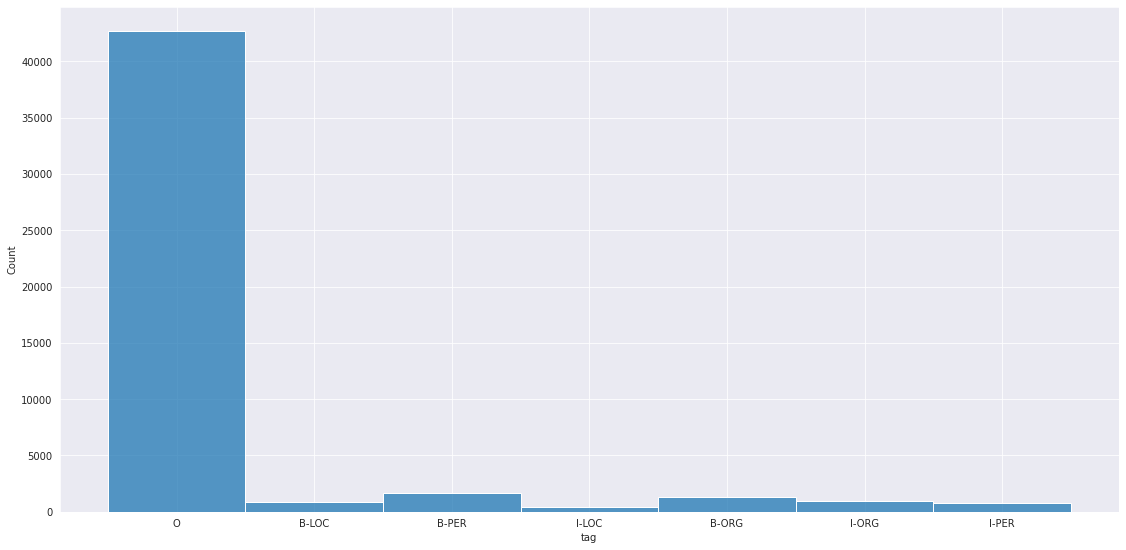

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
sns.histplot(data_merged['tag'])
plt.tight_layout(pad=2)
plt.show()

In [15]:
from itertools import chain
def get_dict_map(dataset, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(dataset['word'].to_list()))
    else:
        vocab = list(set(dataset['tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok, vocab

In [16]:
token2idx, idx2token, word_vocab = get_dict_map(data_merged, 'token')
tag2idx, idx2tag, tag_vocab = get_dict_map(data_merged, 'tag')
idx2tag

{0: 'O',
 1: 'I-LOC',
 2: 'B-ORG',
 3: 'I-PER',
 4: 'B-PER',
 5: 'I-ORG',
 6: 'B-LOC'}

Memastikan `idx2tag[0] =` **`"O"`** dan `idx2token[0] =` **`"ENDPAD"`**

In [18]:
print(idx2token[0])
print(idx2tag[0])

bersyarat
O


In [23]:
print(len(token2idx))
print(idx2token[8541])

idx2token[0] = "ENDPAD"
idx2token[8542] = "bersyarat"

token2idx["ENDPAD"] = 0
token2idx["bersyarat"] = 8542

print(idx2token[0])
print(token2idx["ENDPAD"])

8542
produk
ENDPAD
0


In [25]:
print(len(token2idx))
print(idx2token[8542])
print(token2idx["bersyarat"])

8543
bersyarat
8542


Export dictionary ke dalam file JSON

In [27]:
# importing the module
import json

# Write dict to JSON file
with open("/content/drive/MyDrive/Colab Notebooks/FP-DM/output/token2idx.json", "w") as outfile:
    json.dump(token2idx, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2token.json", "w") as outfile:
    json.dump(idx2token, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-DM/output/tag2idx.json", "w") as outfile:
    json.dump(tag2idx, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2tag.json", "w") as outfile:
    json.dump(idx2tag, outfile)

Generate Kolom **`word_idx`** dan **`tag_idx`** sebagai representasi numerik dari data text

In [28]:
data_traindf['word_idx'] = data_traindf['word'].map(token2idx)
data_traindf['tag_idx'] = data_traindf['tag'].map(tag2idx)

data_testdf['word_idx'] = data_testdf['word'].map(token2idx)
data_testdf['tag_idx'] = data_testdf['tag'].map(tag2idx)

In [29]:
data_traindf

,sentence #,word,tag,word_idx,tag_idx
0,1,Berikut,O,7983,0
1,1,adalah,O,2039,0
2,1,tujuh,O,4980,0
3,1,kota,O,41,0
4,1,di,O,4961,0
...,...,...,...,...,...
30243,1464,kita,O,4705,0
30244,1464,",",O,7275,0
30245,1464,ucap,O,7791,0
30246,1464,Fadli,B-PER,855,4


In [30]:
data_testdf

,sentence #,word,tag,word_idx,tag_idx
0,1,Meski,O,4549,0
1,1,demikian,O,4487,0
2,1,",",O,7275,0
3,1,ia,O,5670,0
4,1,menegaskan,O,5148,0
...,...,...,...,...,...
10583,509,keluarga,O,3747,0
10584,509,-lah,O,2169,0
10585,509,",",O,7275,0
10586,509,ujarnya,O,3526,0


Export data train dan data test ke CSV untuk digunakan saat membangun model Word Embedding dan Klasifikasi

In [31]:
data_traindf.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train_baseline_fix_index.csv')

In [32]:
data_testdf.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test_baseline_fix_index.csv')

Menghitung **`mean`** dan **`modus`** dari panjang kata setiap kalimat untuk mendapatkan **`max_len`** yang akan digunakan saat melakukan padding

In [7]:
data_merged_fillna = data_merged.fillna(method='ffill', axis=0)

data_merged_group = data_merged_fillna.groupby(['sentence #'],as_index=False)['word', 'tag'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data_merged_group

,sentence #,word,tag
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O, O,..."
1,10,"[Siapapun, bisa, membantu, dengan, menyortir, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,100,"[Pak, Suhardi, berpantang, untuk, makan, gandu...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,..."
3,1000,"[Menurut, Rofikoh, ,, penilian, efesiensi, ini...","[O, B-PER, O, O, O, O, O, O, O, O, O]"
4,1001,"[Ini, tertulis, ,, bukan, hanya, tersirat, ,, ...","[O, O, O, O, O, O, O, O, O]"
...,...,...,...
1459,995,"[Namun, mereka, kemudian, berpisah, dan, tahun...","[O, O, O, O, O, O, O, O, O, O, O, B-LOC, O, O,..."
1460,996,"[Anggaran, negara, sudah, terlalu, besar, .]","[O, O, O, O, O, O]"
1461,997,"[Semua, itu, memperkuat, bukti, bantuan, dan, ...","[O, O, O, O, O, O, O, B-ORG, O, O, O, O, O, O,..."
1462,998,"[Mereka, berharap, Jokowi, dapat, memberikan, ...","[O, O, B-PER, O, O, O, O, O, O, O, O, O, O, O,..."


In [9]:
data_merged_group["word_freq"] = data_merged_group["word"].str.len()

In [10]:
data_merged_group

,sentence #,word,tag,word_freq
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O, O,...",54
1,10,"[Siapapun, bisa, membantu, dengan, menyortir, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",55
2,100,"[Pak, Suhardi, berpantang, untuk, makan, gandu...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,...",82
3,1000,"[Menurut, Rofikoh, ,, penilian, efesiensi, ini...","[O, B-PER, O, O, O, O, O, O, O, O, O]",11
4,1001,"[Ini, tertulis, ,, bukan, hanya, tersirat, ,, ...","[O, O, O, O, O, O, O, O, O]",9
...,...,...,...,...
1459,995,"[Namun, mereka, kemudian, berpisah, dan, tahun...","[O, O, O, O, O, O, O, O, O, O, O, B-LOC, O, O,...",16
1460,996,"[Anggaran, negara, sudah, terlalu, besar, .]","[O, O, O, O, O, O]",6
1461,997,"[Semua, itu, memperkuat, bukti, bantuan, dan, ...","[O, O, O, O, O, O, O, B-ORG, O, O, O, O, O, O,...",31
1462,998,"[Mereka, berharap, Jokowi, dapat, memberikan, ...","[O, O, B-PER, O, O, O, O, O, O, O, O, O, O, O,...",17


In [11]:
data_merged_group.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq,1464.0,33.264344,21.704136,3.0,17.0,27.0,46.0,112.0


In [14]:
data_merged_group.mode(numeric_only=True)

,word_freq
0,16


In [15]:
data_modus = data_merged_group.loc[data_merged_group['word_freq'] == 16]
data_modus

,sentence #,word,tag,word_freq
21,1017,"[Juga, ditemukan, bahwa, mereka, naik, jauh, l...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",16
27,1022,"[Partai, Amanat, Nasional, (PAN), Sulawesi, Se...","[B-ORG, I-ORG, I-ORG, I-ORG, B-LOC, I-LOC, O, ...",16
40,1034,"[Ini, sangat, berkaitan, dengan, kualitas, per...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",16
43,1037,"[Hal, ini, ditegaskan, Ketua, Fraksi, PDIP, Tj...","[O, O, O, O, O, B-ORG, B-PER, I-PER, O, B-ORG,...",16
45,1039,"[Negatif, foto, dikubur, di, tanah, dekat, seb...","[O, O, O, O, O, O, O, O, O, O, O, B-LOC, I-LOC...",16
64,1056,"[Apalagi, ,, saya, sudah, kenal, dengan, Om, R...","[O, O, O, O, O, O, O, B-PER, O, O, O, B-LOC, O...",16
85,1075,"[DPD, Partai, Demokrat, Bali, pun, sudah, meng...","[O, B-ORG, I-ORG, O, O, O, O, O, O, O, O, O, O...",16
88,1078,"[Uniknya, ,, radio, ini, disiarkan, dalam, dua...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",16
142,1126,"[Mesir, menyeru, Israel, dan, Palestina, ,, Mi...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",16
148,1131,"[TB, menyebutkan, ,, Jawa, Barat, menjadi, sal...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...",16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bde30e890>]],
      dtype=object)

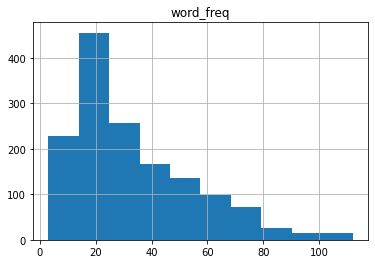

In [16]:
data_merged_group.hist(column="word_freq")